### K-Means 알고리즘
- 비슷한 샘플끼리 Centroid(군집 중심점)을 통해 군집 형성
1. 임의의 Centroid(군집 중심점)을 설정
2. Centroid로부터 거리 계산을 통해 가까운 데이터 포인트들을 선점
3. 가장 가까운 데이터 포인트들로부터, 평균 중심으로 Centroid를 업데이트
4. 수렴(Centroid의 이동이 없을 때)할 때까지 2~3단계를 반복
---
- 쉽고 간결함
- 일반적인 군집화에 많이 활용됨
- 거리 기반의 알고리즘이다보니, 속성의 개수(차원의 수)가 많은 경우 군집화 정확도가 떨어짐
- 몇 개의 군집(K 수)을 선택해야 할 지 알 수가 없음

In [99]:
# !pip install -U mglearn
# 머신러닝 교육할 때 시각화를 위한 도구들을 제공하는 라이브러리

In [100]:
# !pip install -U scikit-learn numpy

In [101]:
import mglearn

In [102]:
import matplotlib.pyplot as plt

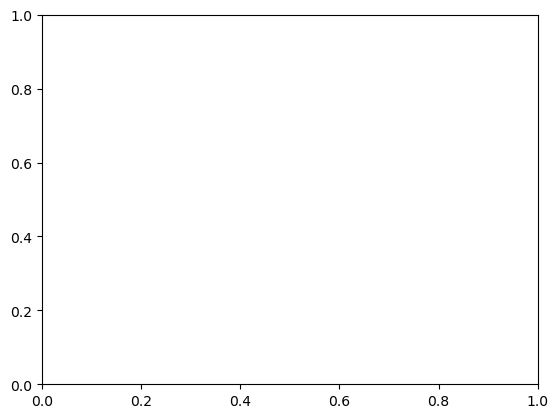

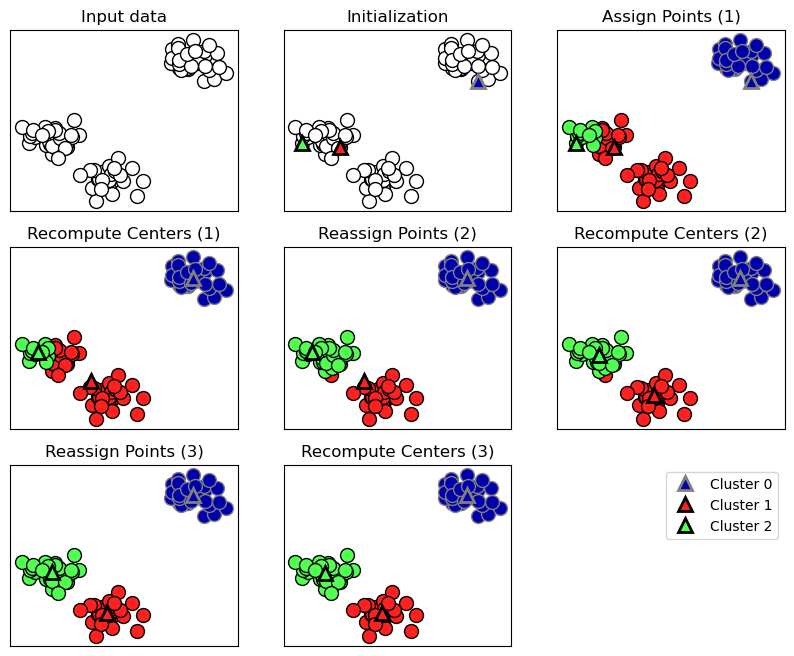

In [103]:
mglearn.plots.plot_kmeans_algorithm()
plt.show()

- 알고리즘이 클러스터 중심으로 삼을 데이터 포인트(Centroid) 3개를 무작위로 설정
    - 할당 된 포인트의 평균값으로 클러스터 중심(Centroid)을 갱신
    - 클러스터 중심에 할당되는 데이터 포인트에 변화가 없을 때까지 반복

In [104]:
import numpy as np
import pandas as pd

In [105]:
from sklearn.datasets import load_iris # 붓꽃 데이터셋

In [106]:
iris = load_iris()

In [107]:
iris
# 번치객체(다발, 딕셔너리처럼 활용)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [108]:
# X(문제데이터) 생성
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [109]:
# y(정답 데이터) 생성 -> 클러스터링 후 비교를 위해 별도로 빼놓기
labels = pd.DataFrame(iris.target)
labels.columns = ["labels"]

In [110]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [111]:
# 2차원으로 시각화하기 위해 2개의 특징만 사용
feature = data[["sepal length (cm)", "sepal width (cm)"]]
feature

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [112]:
from sklearn.cluster import KMeans # K-평균 클러스터링 알고리즘

In [113]:
# 모델 초기화(생성)
model = KMeans(
    n_clusters = 3, # 클러스터 개수(K수) 설정
    algorithm = "lloyd", # K-Mean 알고리즘 설정
    # 로이드 알고리즘, 기본값(스튜어트 로이드가 만듬)
    n_init = 10, # 초기 중심점을 무작위로 선택하는 횟수를 설정 -> 그 중에 가장 좋은 결과를 선택
    random_state = 2024 # 난수고정
)

# 학습
model.fit(feature)

KMeans(n_clusters=3, n_init=10, random_state=2024)

In [114]:
# 예측
pred = model.predict(feature)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [115]:
# 예측한 컬럼으로 feature에 합치기
pred_df = pd.DataFrame(pred, columns = ["predict"])
df = pd.concat([feature, pred_df], axis = 1)

In [116]:
df

,sepal length (cm),sepal width (cm),predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


In [117]:
# 교차표 : 두 열의 값들이 각각 몇 번 나타나는지 카운팅
ct = pd.crosstab(labels['labels'], df['predict'])
ct

# labels : 실제값
# predict : 예측값
# 해석 : 실제값 0인 데이터 포인트가 예측 레이블 2로 50번 분류했다!

# labels 0은 2라는 레이블로 잘 분리를 했다!
# 1은 12개, 2는 15개가 잘 못 분리되어있다!

predict,0,1,2
labels,,,
0,0,0,50
1,38,12,0
2,15,35,0


In [118]:
# Centroid 확인
model.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [119]:
# 시각화를 위해 Centroid로 DF 생성
centers = pd.DataFrame(model.cluster_centers_, columns = feature.columns)
centers

,sepal length (cm),sepal width (cm)
0,5.773585,2.692453
1,6.812766,3.074468
2,5.006000,3.428000


In [120]:
df['predict'].value_counts()

predict
0    53
2    50
1    47
Name: count, dtype: int64

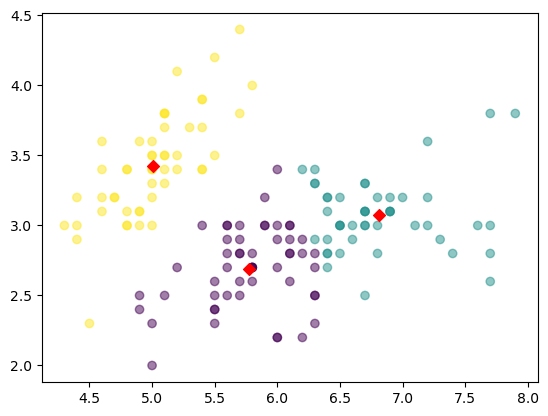

In [121]:
# 데이터 포인트들을 Centroid와 함께 시각화
plt.scatter(
    df['sepal length (cm)'], # x축 좌표 설정
    df['sepal width (cm)'], # y축 좌표 설정
    c = df["predict"], # 예측 된 군집 레이블에 따라 색상을 다르게 표시
    alpha = 0.5 # 투명도(반투명하게 설정)
)

# Centroid의 x축 좌표
center_x = centers["sepal length (cm)"]

# Centroid의 y축 좌표
center_y = centers["sepal width (cm)"]

# Centroid 시각화
plt.scatter(center_x, center_y, marker = "D", c = "r")

plt.show()

- 군집화가 어느 정도 효율적으로 잘 되었는지를 평가할 수 있는 지표들이 별도로 존재함
    - 지도학습(ex.분류)과 비지도학습의 평가지표는 다름
    - 클러스터링의 경우 같은 클러스터에 같은 포인트가 들어있는지, 다른 클러스터 간에 다른 포인트가 들어가있는지가 중요
    - 비지도 학습 특성 상 어떠한 지표값이라도 정확하게 성능을 평가하기는 어려움

### 비지도 학습 평가 지표 - ARI(Adusted Rand Index)
- 실제 라벨(또는 다른 비지도 예측 레이블)이 필요함!
- Rand Index(RI) : 가능한 모든 쌍의 경우에 대해 정답(ex.같은 그룹과 같은 그룹으로, 다른 그룹은 다른 그룹으로)인 쌍의 갯수를 비율로 정의
- RI의 문제점은 무작위로 클러스터링을 한 경우에도 어느 정도 좋은 값이 나올 가능성이 높다는 점이 문제
- ARI : RI의 기댓값(확률의 평균값)을 원래의 RI값에서 빼서, 기댓값과 분산을 재조정한 것(-1 ~ 1)
---
- 1에 가까울수록 두 클러스터링(예측한 레이블, 실제 레이블)의 결과가 완벽하게 일치
- 0에 가까울수록 두 클러스터링 결과가 특별히 잘 맞지도 않고, 완전히 엉망도 아닌 상태
    - 우연의 일치로 맞추는 편
- 음수에 가까울수록 두 클러스터링 결과가 우연의 일치보다 못함

In [122]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
# AMI : ARI랑 비슷한 지표(두 클러스터링 결과 간의 유사성 측정)
# MI를 보정한 지표
# 결과 해석은 비슷

In [123]:
# 예측한 라벨값 확인
model.labels_ # == model.predict(feature)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [124]:
print(f"ARI: {adjusted_rand_score(labels['labels'], model.labels_):.2f}")
print(f"AMI: {adjusted_mutual_info_score(labels['labels'], model.labels_):.2f}")

# 둘 다 0.6 정도에 근사치로, 실제값과 어느정도 일치하기는 하나, 완벽하지는 않다고 해석할 수 있음

ARI: 0.60
AMI: 0.64


- 대부분의 군집화 데이터 set은 ARI나 AMI처럼 비교할만한 실제 레이블을 가지고 있지 않음
- 실제 레이블 값이 있으면 지도 학습 모델을 만들기에, 비지도 학습 모델에는 적합하진 않음 -> 지도학습 특성공학에 활용되어 볼 수는 있음
- 그러다보니 ARI, AMI의 경우에는 애플리케이션(모델 서비스)의 성능 평가가 아니라, 지도학습의 특성공학에 대한 성능 평가처럼 알고리즘을 개발하거나 특정 프로세스 때 도움이 됨

### 비지도 학습 평가지표 - Silhouette analysis(실루엣 분석)
- 실루엣 계수 : 클러스터링이 효율적으로 잘 되었는지를 확인할 수 있는 지표 (-1 ~ 1)
    - 1에 가까울수록 데이터 포인트가 잘 군집화 되어있고, 다른 클러스터와 잘 분리되어 있음을 의미
    - 0에 가까울수록 데이터 포인트가 클러스터 경계에 위치하고 있음을 의미
    - -1에 가까울수록 데이터 포인트가 잘 못 군집화되었음을 의미

In [125]:
from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_samples : 각 데이터 포인트의 실루엣 계수를 계산해주는 도구
# silhouette_score : 전체 데이터에 대한 평균 실루엣 계수를 계산해주는 도구

In [126]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [127]:
# 평균 실루엣 확인
print(f"평균 실루엣 계수 : {silhouette_score(feature, pred):.2f}")

평균 실루엣 계수 : 0.45


In [128]:
# 각 데이터 포인트의 실루엣 계수를 계산
silhouette_vals = silhouette_samples(feature, pred)

In [129]:
# 각 데이터 포인트들의 실루엣 계수를 컬럼으로 추가
df_sil = pd.concat([df, pd.Series(silhouette_vals, name = "silhouette_coef")], axis = 1)
df_sil.head()

,sepal length (cm),sepal width (cm),predict,silhouette_coef
0,5.1,3.5,2,0.598215
1,4.9,3.0,2,0.406125
2,4.7,3.2,2,0.561162
3,4.6,3.1,2,0.508734
4,5.0,3.6,2,0.623153


In [130]:
# 각 클러스터별 실루엣 계수의 평균값 확인
df_sil.groupby("predict")["silhouette_coef"].mean()

# 어떠한 레이블 상관없이, 실루엣 계수가 낮은 것을 확인
# 보통 0.7보다 크면 잘 분류되었다고 판단됨

predict
0    0.404766
1    0.442581
2    0.490080
Name: silhouette_coef, dtype: float64

### 최적의 클러스터의 수 결정하기
- 엘보우 기법(Elbow method)
- SSE(클러스터 내 데이터 포인트들이 클러스터 중심으로부터 얼마나 떨어져 있는지를 나타내는 값)가 가장 완만해지는 K 수를 찾기
    - 가장 효율적인 클러스터링의 수를 의미

In [131]:
# inertia(SSE, Sum of Squared Errors) : 군집화 한 이후에, 각 중심점에서 데이터 포인트간의 거리를 합산한 것
model.inertia_

37.0507021276596

In [132]:
# 엘보우 그리기

# 군집 개수 범위 설정
ks = range(1, 10) # 1 ~ 9
inertias = [] # SSE를 담아둘 리스트

for k in ks : 
    model = KMeans(
        n_clusters = k, # 군집개수 1~9로 설정
        n_init = 10, # 초기 중심점을 무작위로 선택하는 횟수를 설정, 그 중에서 가장 괜찮은 초기 중심점을 선택
        random_state = 2024 # 난수고정
    )
    # 각각의 군집 개수로 학습
    model.fit(feature)
    inertias.append(model.inertia_) # SSE값 쌓아두기

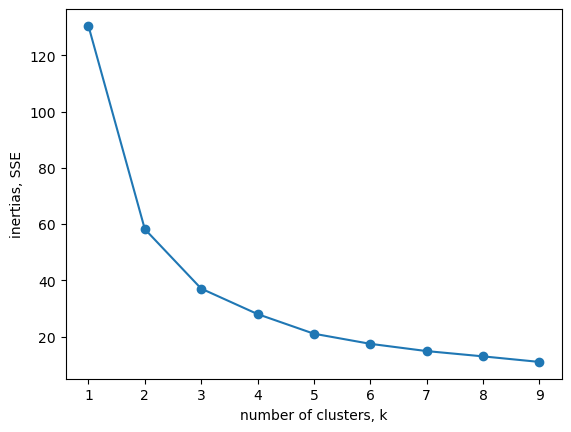

In [133]:
# 군집 개수에 따른 시각화
plt.plot(ks, inertias, '-o')
plt.xlabel("number of clusters, k")
plt.ylabel("inertias, SSE")

plt.show()

- 클러스터의 수가 3일 때, 그래프의 기울기가 크게 완만해짐을 관측
- k = 3일 때 급격한 감소가 멈추고, 그 이후로는 더 많은 클러스터를 추가하더라도 SSE가 크게 감소하지 않음을 확인
- 3이 가장 합리적인 군집 개수라고 판단해볼 수 있음!

In [134]:
# 여태 2가지 특성만 활용함
# 이번에 4가지 특성을 다 활용해보자!
feature

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [135]:
# df 다시 만들어주기
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [136]:
from sklearn.pipeline import make_pipeline # 기능 연결 도구
from sklearn.preprocessing import StandardScaler # 스케일러

In [137]:
# 스케일링 추가 : K-Means 알고리즘도 거리 기반이다 보니, 스케일링을 적용할 경우 더 명확한 Centroid를 찾을 수 있음

# 스케일러 초기화(생성)
scaler = StandardScaler()

# Kmeans 모델 초기화(생성)
model = KMeans(
    n_clusters = 3, 
    n_init = 10, 
    random_state = 2024
)

In [138]:
# 기능 결합(scaler + KMeans)
pipeline = make_pipeline(scaler, model)

# 학습
pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=2024))])

In [139]:
# 예측
pred_labels = pipeline.predict(df) # KMeans.labels_ 와 같음
pred_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [140]:
df["label"] = pred_labels

In [141]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
# ARI, AMI 확인 -> -1 ~ 1 사이의 값, 1에 가까울수록 실제값과 일치하다!!
print(f"ARI : {adjusted_rand_score(iris.target, pred_labels):.2f}")
print(f"AMI : {adjusted_mutual_info_score(iris.target, pred_labels):.2f}")

ARI : 0.62
AMI : 0.66


In [143]:
# 실루엣 계수 확인

feature = df.loc[:,:"petal width (cm)"]
pred = df["label"]

# 각 데이터 포인트에 대한 실루엣 계산
silhouette_vals = silhouette_samples(feature, pred)

In [144]:
# Groupby를 위한 DF 합치기
df_sil = pd.concat([df, pd.Series(silhouette_vals, name = "silhouette_coef")], axis=1)
df_sil.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.851185
1,4.9,3.0,1.4,0.2,1,0.812342
2,4.7,3.2,1.3,0.2,1,0.826574


In [145]:
# 각 클러스터별 실루엣 계수의 평균값 확인
df_sil.groupby("label")["silhouette_coef"].mean()

label
0    0.393576
1    0.795561
2    0.325221
Name: silhouette_coef, dtype: float64

In [146]:
# 평균 실루엣 계수 계산
silhouette_score(feature, pred)

0.5061527484935537

### 손글씨 데이터 군집

In [147]:
from sklearn.datasets import load_digits # 손글씨 데이터셋

In [148]:
digits = load_digits() # 손글씨 데이터 로드

In [149]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [150]:
digits.images[11], digits.target[11]

(array([[ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.],
        [ 0.,  0.,  0.,  5., 16., 16.,  2.,  0.],
        [ 0.,  0.,  0., 14., 16., 12.,  0.,  0.],
        [ 0.,  1., 10., 16., 16., 12.,  0.,  0.],
        [ 0.,  3., 12., 14., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  0.,  5., 16., 15.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 16., 14.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 13., 16.,  1.,  0.]]),
 1)

In [151]:
digits.target[15]

5

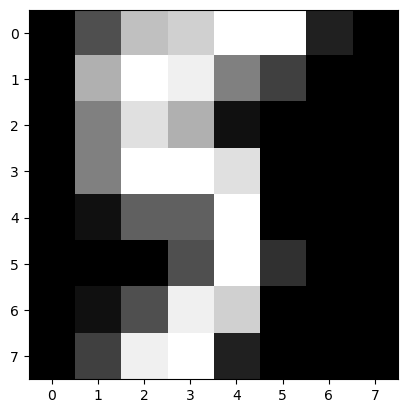

In [152]:
# 이미지 띄우기
plt.imshow(digits.images[15], cmap = "gray")
plt.show()

In [153]:
digits.images[15].shape

(8, 8)

In [154]:
# 서브 플랏 : 여러 차트(또는 이미지) 그리기
fig, axes = plt.subplots(
    2, 5, # 2행 5열의 그리드로 서브플롯을 생성
    figsize = (10, 5), # 전체 이미지의 크기 설정
    subplot_kw = {'xticks':(), 'yticks':()} # 각 서브 플롯의 x축과 y축 눈금을 표시하지 않겠다!
)

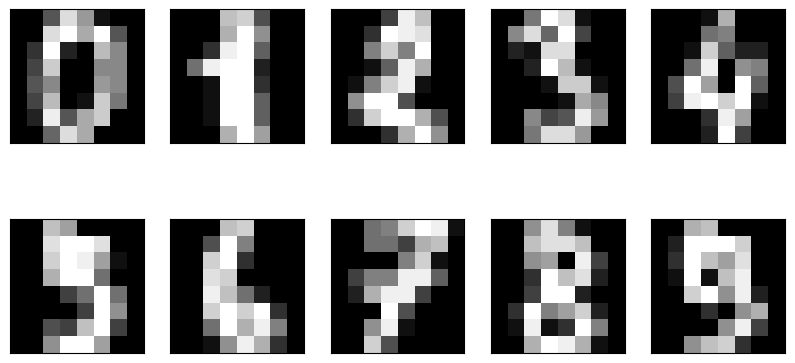

In [155]:
# 이미지 시각화 - MNIST 손글씨 데이터 시각화
# axes.ravel() : 2차원 배열을 1차원으로 평탄화
# digits.images : 손글씨 이미지 데이터를 포함하는 배열

for ax, img in zip(axes.ravel(), digits.images) : 
    ax.imshow(img, cmap = "gray")

plt.show()

In [156]:
# 모델 초기화
model = KMeans(
    n_clusters = 10, # 10개의 군집 수
    n_init = 10, 
    random_state = 2024
)

# 학습
model.fit(digits.data)

KMeans(n_clusters=10, n_init=10, random_state=2024)

In [157]:
# 예측
y_pred = model.labels_

In [158]:
y_pred == 0 # 클러스터 레이블이 0인 데이터 포인트들을 찾기

array([False,  True,  True, ...,  True, False, False])

In [159]:
digits.data.shape

(1797, 64)

In [160]:
# 예측 라벨 0인 데이터 포인트들만 불러와서 불리안 인덱싱
digits.data[y_pred == 0][11].reshape(8, 8) # 0번째 데이터를 지정

array([[ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.],
       [ 0.,  6., 16.,  9., 12., 16.,  2.,  0.],
       [ 0.,  7., 16.,  9., 15., 13.,  0.,  0.],
       [ 0.,  0., 11., 15., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]])

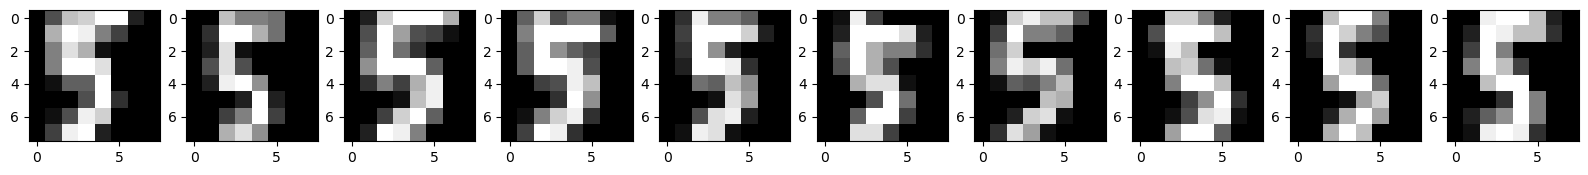

In [165]:
# 예측 라벨 0인 데이터 포인트들을 시각화해서, 실제로 군집이 잘 되었는지 육안으로 확인
plt.figure(figsize=(20, 3))
for i in range(10) : # 예측 라벨 0인 데이터 포인트들을 10개의 이미지만 표시하기 위해 설정
    plt.subplot(1, 10, i+1) # 서브플롯 생성(1행 10열의 그리드, i+1번째 위치에서 서브 플롯 생성)
    plt.imshow(digits.data[y_pred == 4][i].reshape(8, 8), cmap = 'gray')
plt.show()

# 섞여 있는 정도를 확인

In [167]:
adjusted_rand_score(digits.target, model.labels_)

0.6699245597444055

In [168]:
#실루엣 계수
faeture = digits.data # 문제데이터

# 각 데이터포인트별로 실루엣 계수 계산
sil_val =silhouette_samples(feature, y_pred)

# groupby를 위한 df 생성
dv_sil = pd.DataFrame({'cluster':y_pred, 'silhouette_coef':sil_val})

# 각 클래스별로 실루엣 계수 평균값 확인
df_sil.groupby("cluster")["silhouette_coef"].mead()

# 클래스도 많고, 각 클래스 별로 비슷한 부분도 많아서 실루엣 계수가 현저히 낮음


ValueError: Found input variables with inconsistent numbers of samples: [150, 1797]

### 계층적 클러스터링(Hierachical clustering)
- sklearn에서 제공되는 계층적 클러스터링 -> 병합 군집(Agglomerative Clustering)
- 병합 군집 : 아래에서 위로 군집해나가는 방식 <-> 분할군집 : 위에서 아래

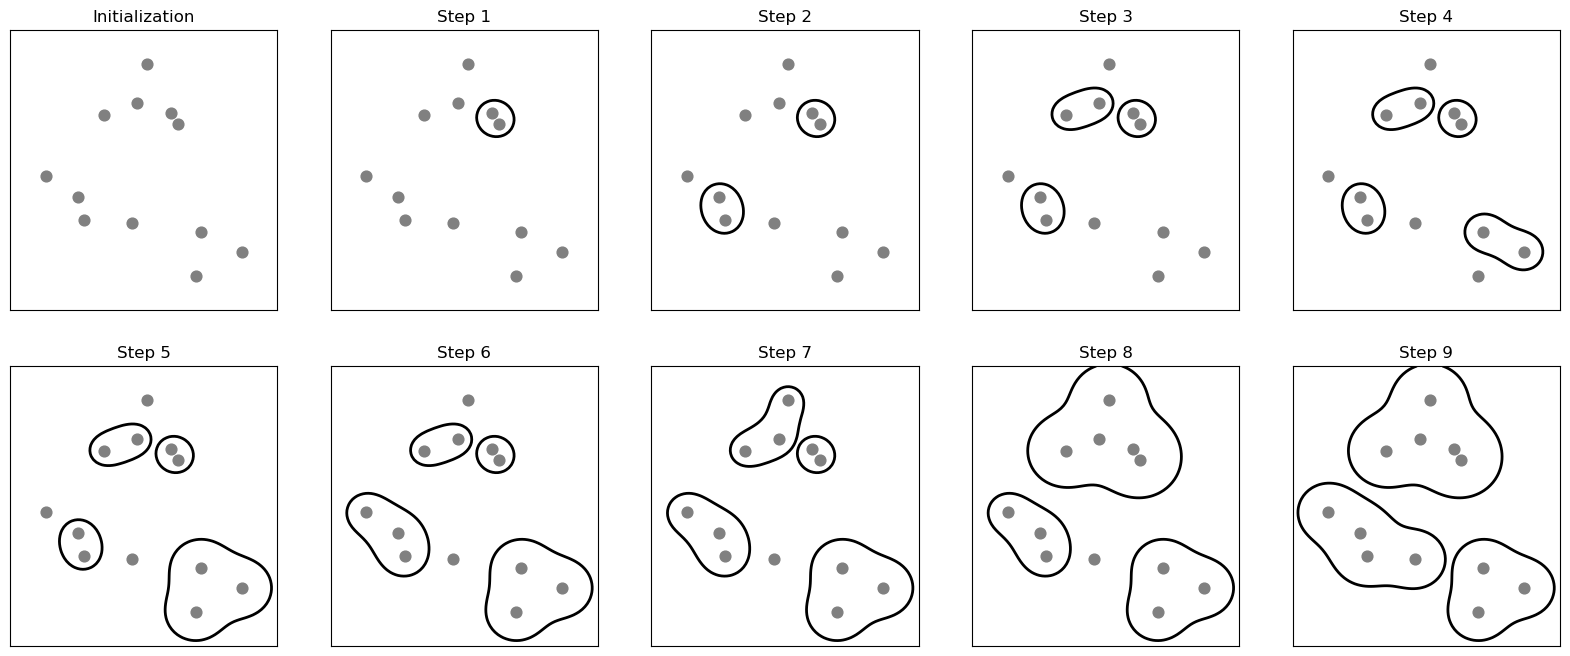

In [169]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

1) 초기에 각 포인트가 하나의 클러스터 -> 가장 가까운 클러스터를 합침
2) step4까지 포인트가 하나뿐인 클러스터 2개가 선택되어 합쳐지며, 2개 포인트를 가진 클러스터가
3) step5까지 2개의 포인트를 가진 클러스터 중 하나가 세 개의 포인트로 확장
4) step9에 이르면 클러스터가 3개만 남음-> 3개의 클러스터로 찾는다고 설정하였다면 여기서 멈춤

In [172]:
from sklearn.cluster import AgglomerativeClustering #병합 군집 알고리즘
# 거리기반이다 보니, 성능으로 쓰기보다는 덴드로그램 확인용으로 많이 활

In [173]:
model = AgglomerativeClustering(
    n_clusters = 3, # 최종적으로 3개의 클러스터로 군집화
    linkage = 'ward' #병합 방법 설정, ward : 모든 클러스터 내분산을 가장 작게 증가시키는 클러스트를 합
)

# 모델 학습
model.fit(digits.data)

AgglomerativeClustering(n_clusters=3)

#### AgglomerativeClustring의 linkage  옵션
- 방식들에 대해 명확한 기준은 없음, 일반적인 경험과 함께 덴드로그램으로 확인 가능
1) ward : 모든 클러스터 내의 분산(각 데이터 포인트와 클러스터 중심 간의 거리 제곱함, 퍼짐정도)을 가장 적게 증가시키는 두 클러스터를 합침
2) average : 두 클러스터의 모든 데이터 포인트 쌍 사이의 평균 거리를 계산하고, 평균 거리가 가장 짧은 두 클러스터를 합
3) complete : 두 클러스터의 모든 데이터 포인트 쌍 사이의 최대 거리를 계산하고, 이 최대 거리가 가장 짧은 두 클러스터를 합침

In [175]:
label = model.labels_ # 병합 군집 알고리즘의 예측 레이블
label

array([0, 2, 2, ..., 2, 1, 2], dtype=int64)

In [178]:
# 덴드로그램 그려보기
from scipy.cluster.hierarchy import dendrogram, ward # 덴드로 그램을 그리기 위한 도구

# 병합 군집을 수행할 때 생성 된 거리 정보가 담긴 배열 담
linkage_array = ward(digits.data)

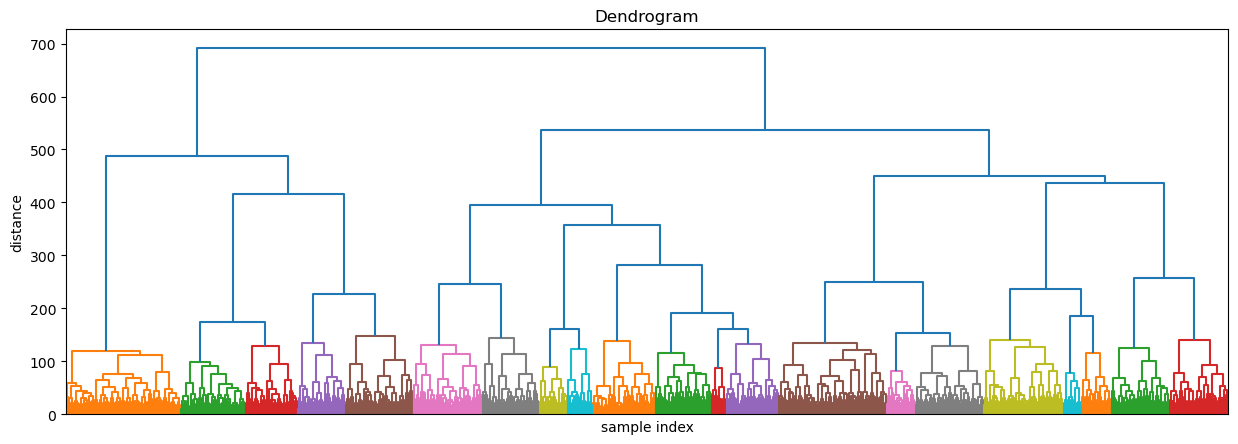

In [181]:
plt.figure(figsize=(15,5))
plt.title("Dendrogram")

dendrogram(
    linkage_array,
    no_labels = True, 
    color_threshold =150 # 클러스터를 색상으로 구분할 임계값 설정
)
plt.xlabel("sample index")
plt.ylabel("distance")
plt.show()

- y축 값이 높으면 높을수록 클러스터 간의 유사성이 낮음을 의미
- 덴드로그램에서 커트라인을 그어볼 경우, 적절한 k값을 찾을 수 있음
- 해당 덴드로그램은 10개라는 답을 알고 있지만, 실제로는 더 적은 k수를 고려해 볼 수 있음


### DBSCAN(밀도 기반 클러스터링 알고리즘)
- 일정한 밀도를 가지는 데이터의 무리가 체인처럼 연결되어 있으면, 거리의 개념과는 관계없이 같은 클러스터로 판단